<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/Generative-Models/blob/main/Pretrained_biggan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image

module_path = "https://tfhub.dev/deepmind/biggan-deep-128/1"
bigan = hub.KerasLayer(module_path)

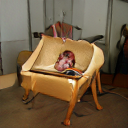

In [2]:
def generate_image(latent_dim=128, class_dim=1000, truncation=0.5):

    latent_vector = np.random.randn(1, latent_dim)
    class_vector = np.random.randn(1, class_dim)


    latent_vector = truncation * latent_vector / np.linalg.norm(latent_vector)
    class_vector = truncation * class_vector / np.linalg.norm(class_vector)


    inputs = {"z": latent_vector, "y": class_vector, "truncation": truncation}
    image = bigan(inputs)


    image = (image.numpy().squeeze() * 127.5 + 127.5).astype(np.uint8)
    image = PIL.Image.fromarray(image)

    return image


generated_image = generate_image()
generated_image.save("biggan_generated_image.png")
generated_image